<font size=5><b>AIRBNB: Seattle Data Analysis</font></b>

<font size=3><b> Business Questions </font></b>
    
The goal this project is to analyze Airbnb seattle data which is available on Kaggle (https://www.kaggle.com/airbnb/seattle?select=listings.csv) and answer the below business questions

1. What are the top 10 neighborhoods in Seattle with most number of hosts and super hosts??
2. What is the % breakdown of property types in Seattle in the listings database?
3. What % of listings are for entire place compared to private or share rooms in listings database?
4. Are the number of hosts increasing every year in Seattle?
5. What is the average price of listings per month?


There are lot of other business questions which can be answered using this dataset, but for this project we will be working on the above 6 questions. To answer the above question we will work on hte "listings.csv" data file.


In [1]:
# Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data file

df = pd.read_csv('listings.csv')
print("The data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())

The data set has 3818 rows and 92 columns


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


object     62
float64    17
int64      13
dtype: int64

<font size=3><b>Data Understanding and Data Preparation </font></b>

In this step we will explore what data is required to answer our questions and prepare the data for the analysis. Analyze if any of these columns are not useful to answer the above business questions, check for missing values, impute/remove data wherever required and get data ready for analysis.

To answer the above questions we do not require lisitng url, scrape id, summary of the property, experiences_offered,neighborhood_overview, name of the property, summary, description, picture info, host url since none of these are useful to answer the above business questions.So can remove these columns.

<b> Dropping columns : </b> To drop columns we will use pandas drop function from. Details on this function can be found in the below line: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [3]:
# Drop columns which are considered not necessary to answer the above business questions
# id,listing_url, scrape_id, last_scraped, name, summary, space, description, experiences_offered, neighborhood_overview, notes,
# transit, host_about, thumbnail_url, medium_url, picture_url, xl_picture_url, host_url, host_thumbnail_url 
#and host_picture_url

df = df.drop(columns =["id", "listing_url", "scrape_id", "last_scraped", "name", "summary", "space", "description", 
                       "experiences_offered", "neighborhood_overview", "notes", "transit","host_about", "thumbnail_url", 
                       "medium_url", "picture_url", "xl_picture_url", "host_url", "host_thumbnail_url", "host_picture_url"],
             axis=1)

display(df.head())


,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,Queen Anne,3.0,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,Queen Anne,6.0,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,Queen Anne,2.0,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,Queen Anne,1.0,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,Queen Anne,2.0,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
display(df.dtypes.value_counts())

object     44
float64    17
int64      11
dtype: int64

In [5]:
# Seperate Numerical variables and categorical variables
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')
Index(['host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city

In [6]:
# Check for % of missing values in each of the numercial columns
df[num_vars].isnull().sum().sort_values(ascending=False)/len(df)

license                           1.000000
square_feet                       0.974594
review_scores_checkin             0.172342
review_scores_accuracy            0.172342
review_scores_value               0.171818
review_scores_location            0.171556
review_scores_cleanliness         0.171032
review_scores_communication       0.170508
review_scores_rating              0.169460
reviews_per_month                 0.164222
bathrooms                         0.004191
bedrooms                          0.001572
host_listings_count               0.000524
host_total_listings_count         0.000524
beds                              0.000262
latitude                          0.000000
longitude                         0.000000
accommodates                      0.000000
availability_30                   0.000000
guests_included                   0.000000
minimum_nights                    0.000000
maximum_nights                    0.000000
calculated_host_listings_count    0.000000
availabilit

In [7]:
# Check for % of missing values in each of the categorical columns
df[cat_vars].isnull().sum().sort_values(ascending=False)/len(df)

monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
cleaning_fee                        0.269775
host_acceptance_rate                0.202462
last_review                         0.164222
first_review                        0.164222
host_response_time                  0.136983
host_response_rate                  0.136983
neighbourhood                       0.108958
host_neighbourhood                  0.078575
host_location                       0.002095
zipcode                             0.001833
host_identity_verified              0.000524
host_has_profile_pic                0.000524
host_name                           0.000524
host_is_superhost                   0.000524
host_since                          0.000524
property_type                       0.000262
host_verifications                  0.000000
street                              0.000000
neighbourhood_cleansed              0.000000
neighbourh

There are 2 numerical columns where >50% of the data is missing. So we will go ahead and delete these 2 columns.
There are 3 categorical columns where>45% of the data is misisng. So will go ahead and delete these columns

There are 13 columns in num_vars which are missing<20% of the data. We will use imputation methods to datafill the missing fields.
There are 16 columns in cat_vars which are missing<30% of the data. We will use imputation methods to datafill the missing fields.

In [8]:
df = df.drop(columns =["license", "square_feet", "monthly_price", "security_deposit", "weekly_price"],
             axis=1)
df.shape

(3818, 67)

There are 3 columns which have dollars are shown as objects when those columns have to numerical. We will remove the $ symbol and convert to float.

In [9]:
# Convert columns with $ and , symbol to float
dollar_cols = ["price", "cleaning_fee", "extra_people"]

for col in dollar_cols:
    df[col] = df[col].str.replace(',', '').str.replace('$', '').astype(float)

There are 2 columns which has % symbolwhich are shown as objects, we will remove the % symbol and convert to float and divide by 100

In [10]:
# convert columns which have % symbol to float
percent_cols = ["host_response_rate", "host_acceptance_rate"]

for col in percent_cols:
    df[col] = df[col].str.replace('%', '').astype(float)

In [11]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['host_id', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')
Index(['host_name', 'host_since', 'host_location', 'host_response_time',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_

There are 3 columns which have data, currently they are shown as categorical columns, we need to convert those to date columns. For our purpose we will convert the date to MM-YY format since we are not doing any day level analysis to answer our questions.

In [12]:
# Convert columns with date columns to date format
date_cols = ["host_since", "calendar_last_scraped", "first_review", "last_review"]

for col in date_cols:
    df[col] = df[col].apply(pd.to_datetime)

In [13]:
# There are 2 rows with no hostname, host since and many other features. lets go and delete these 2 rows
df = df.dropna(subset=['host_name'], how='any', axis=0)
df.shape

(3816, 67)

In [14]:
# Create 3 new col which holds only year, month and month-year seperately for host since col. 
# This will help us in our analysis to answer business questions.

df['host_since_Year'] = pd.DatetimeIndex(df['host_since']).year.astype(int)
df['host_since_month'] = pd.DatetimeIndex(df['host_since']).month.astype(int)
df['host_since_year-month'] = pd.to_datetime(df['host_since']).dt.to_period('M')

<b>zipcode</b> is labelled as object, convert to numerical since we have few fields which are NA pandas gives error 
"cannot convert nan to int" for removing all non-numeric values use to_numeric with parameter 
errors='coerce' - to replace non-numeric values to NaNs: There are only 5 fields which have missing zipcodes, 
there are columns for these 5 rows which are misisng data, so we will remove those rows.

In [15]:

# Convert zip code to numeric
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')

# remove rows with misisng zipcode
df = df.dropna(subset=['zipcode'], how='any', axis =0)

# convert zip code to int
df['zipcode']=df['zipcode'].astype(int)

In [16]:
# Check for % of missing values in each of the numercial columns after data cleaning
df[num_vars].isnull().sum().sort_values(ascending=False)/len(df)

cleaning_fee                      0.269170
host_acceptance_rate              0.201681
review_scores_checkin             0.172006
review_scores_accuracy            0.172006
review_scores_value               0.171481
review_scores_location            0.171218
review_scores_cleanliness         0.170693
review_scores_communication       0.170168
review_scores_rating              0.169118
reviews_per_month                 0.163866
host_response_rate                0.136292
bathrooms                         0.004202
bedrooms                          0.001576
beds                              0.000263
host_listings_count               0.000000
host_total_listings_count         0.000000
latitude                          0.000000
longitude                         0.000000
accommodates                      0.000000
minimum_nights                    0.000000
price                             0.000000
guests_included                   0.000000
extra_people                      0.000000
calculated_

In [17]:
# Check for % of missing values in each of the categorical columns
df[cat_vars].isnull().sum().sort_values(ascending=False)/len(df)

last_review                         0.163866
first_review                        0.163866
host_response_time                  0.136292
neighbourhood                       0.108193
host_neighbourhood                  0.077468
host_location                       0.001576
property_type                       0.000263
require_guest_phone_verification    0.000000
street                              0.000000
city                                0.000000
neighbourhood_group_cleansed        0.000000
neighbourhood_cleansed              0.000000
host_verifications                  0.000000
host_identity_verified              0.000000
host_has_profile_pic                0.000000
zipcode                             0.000000
host_is_superhost                   0.000000
host_since                          0.000000
state                               0.000000
smart_location                      0.000000
market                              0.000000
require_guest_profile_picture       0.000000
country_co

Now with all the data issues cleansed, lets work on the missing values. There are multiple ways of dealing with missing values.
We can impute mean, median or mode for numercial values, since there not many missing values in categorical variables we can impute them with mode.

In [18]:
# function to fill missing values with mean for numerical cols
fill_mean = lambda col: col.fillna(col.mean())

# apply function to fill the missing values
df[num_vars] = df[num_vars].apply(fill_mean)


In [19]:
# for missing values in categorical col we will just imputer as missing data.

df[cat_vars] = df[cat_vars].fillna('Missing_Data')

With all the missing values taken care of we will now try to answer business questions, any further data cleaning on columns which are being used to answer the questions we will do it during the process.

In [20]:
# Fina structure of df
display(df.head())

,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_since_Year,host_since_month,host_since_year-month
0,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96.000000,100.000000,f,Queen Anne,3.0,...,WASHINGTON,f,moderate,f,f,2,4.070000,2011,8,2011-08
1,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98.000000,100.000000,t,Queen Anne,6.0,...,WASHINGTON,f,strict,t,t,6,1.480000,2013,2,2013-02
2,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67.000000,100.000000,f,Queen Anne,2.0,...,WASHINGTON,f,strict,f,f,2,1.150000,2014,6,2014-06
3,9851441,Emily,2013-11-06,"Seattle, Washington, United States",Missing_Data,94.890544,99.967105,f,Queen Anne,1.0,...,WASHINGTON,f,flexible,f,f,1,2.078323,2013,11,2013-11
4,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100.000000,99.967105,f,Queen Anne,2.0,...,WASHINGTON,f,strict,f,f,1,0.890000,2011,11,2011-11


<size font=3><b> Question 1: What are the top 10 neighborhoods in Seattle with most number of hosts and super hosts?</size></b>

To answer the above question we need to analyze the following columns

1. "neighbourhood_cleansed" to get neighborhood name
2. "host_id" to get host count
3. "host_is_superhost" to check for superhost.

In [21]:
# Get host count per neighborhood

h_count = df.groupby('neighbourhood_cleansed')['host_id'].count().sort_values(ascending=False).reset_index().rename(columns={'host_id':'host_count','neighbourhood_cleansed' : 'name'})

In [23]:
#get all data where hosts are superhost
super_host = df[df['host_is_superhost']=='t']

In [78]:
#get count of superhost in each neighborhood
sh_count = super_host.groupby('neighbourhood_cleansed')['host_is_superhost'].count().sort_values(ascending=False).reset_index().rename(columns={'host_is_superhost':'super_host_count','neighbourhood_cleansed' : 'name'})

Text(0.5, 1.0, 'HOST Vs SUPER HOST COUNT PER NEIGHBORHOOD - TOP 10')

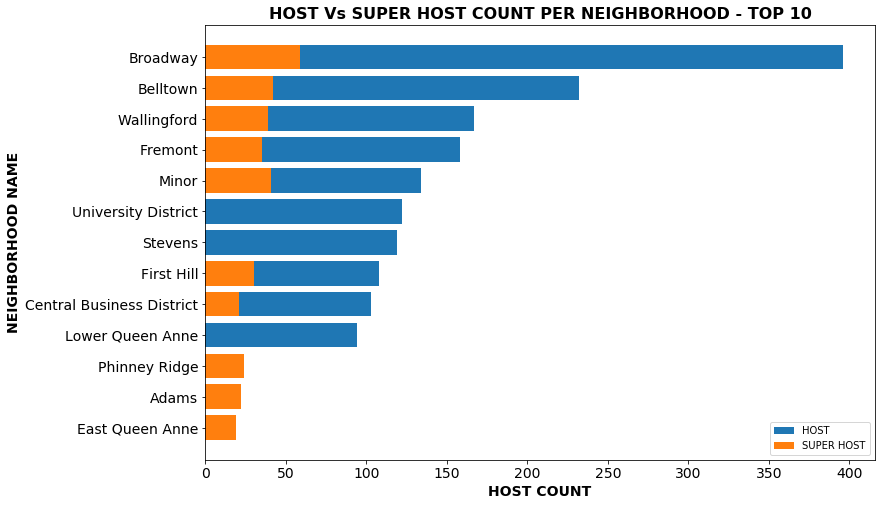

In [76]:
# plot the top 10 neighborhoods with highest super host count
n_name = h_count['name'].head(10)
count = h_count['host_count'].head(10)

n_name_1 = sh_count['name'].head(10)
count_1 = sh_count['super_host_count'].head(10)

fig,ax = plt.subplots(figsize=(12,8))
ax.invert_yaxis()

ax.barh(n_name, count, label = "HOST")
ax.legend(loc="lower right")
ax.barh(n_name_1, count_1, label = "SUPER HOST")
ax.legend(loc="lower right")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('HOST COUNT',fontsize=14, weight="bold")
ax.set_ylabel('NEIGHBORHOOD NAME',fontsize=14, weight="bold")
ax.set_title('HOST Vs SUPER HOST COUNT PER NEIGHBORHOOD - TOP 10',fontsize=16, weight="bold")




<size font=3><b> Question 1a: What are the top 10 neighborhoods in Seattle with the highest avg listing price?</size></b>

To answer the above question we need to analyze the following columns

1. "neighbourhood_cleansed" to get neighborhood name
2. "price"

In [52]:
neighborhood_price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).reset_index().rename(columns={'price':'Avg.listing price','neighbourhood_cleansed' : 'name'})

Text(0.5, 1.0, 'AVG. LISTING PRICE PER NEIGHBORHOOD - TOP 10 / BOTTOM 10')

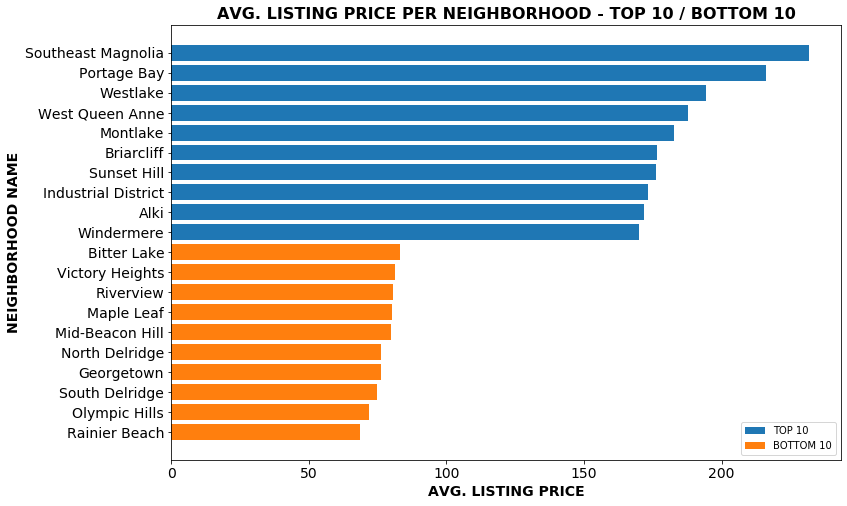

In [66]:
n_name_2 = neighborhood_price['name'].head(10)
n_price = neighborhood_price['Avg.listing price'].head(10)

n_name_3 = neighborhood_price['name'].tail(10)
n_price_3 = neighborhood_price['Avg.listing price'].tail(10)

fig,ax = plt.subplots(figsize=(12,8))
ax.barh(n_name_2, n_price, label="TOP 10")
ax.legend(loc="lower right")
ax.barh(n_name_3, n_price_3, label = "BOTTOM 10")
ax.legend(loc="lower right")
ax.invert_yaxis()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('AVG. LISTING PRICE', fontsize=14, weight="bold")
ax.set_ylabel('NEIGHBORHOOD NAME', fontsize=14, weight="bold")
ax.set_title('AVG. LISTING PRICE PER NEIGHBORHOOD - TOP 10 / BOTTOM 10', fontsize=16, weight="bold")



<size font=3><b> Question 2: What is the % breakdown of property types in Seattle in the listings database?</size></b>

To answer the above question we need to analyze the following columns

1. "property_type"

In [26]:
df['property_type'].value_counts()

House              1729
Apartment          1704
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      36
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  7
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Missing_Data          1
Yurt                  1
Name: property_type, dtype: int64

In [27]:
prop_p = df['property_type'].value_counts()/len(df['property_type'])*100
prop_p

House              45.404412
Apartment          44.747899
Townhouse           3.098739
Condominium         2.389706
Loft                1.050420
Bed & Breakfast     0.945378
Other               0.577731
Cabin               0.551471
Camper/RV           0.341387
Bungalow            0.341387
Boat                0.183824
Tent                0.131303
Treehouse           0.078782
Chalet              0.052521
Dorm                0.052521
Missing_Data        0.026261
Yurt                0.026261
Name: property_type, dtype: float64

In [28]:
prop_type_percentage = prop_p.rename_axis("Property_type").reset_index(name="% of Property_types")
prop_type_percentage

,Property_type,% of Property_types
0,House,45.404412
1,Apartment,44.747899
2,Townhouse,3.098739
3,Condominium,2.389706
4,Loft,1.050420
5,Bed & Breakfast,0.945378
6,Other,0.577731
7,Cabin,0.551471
8,Camper/RV,0.341387
9,Bungalow,0.341387


Text(0.5, 1.0, 'PROPERTY TYPE PERCENTAGE BREAKDOWN')

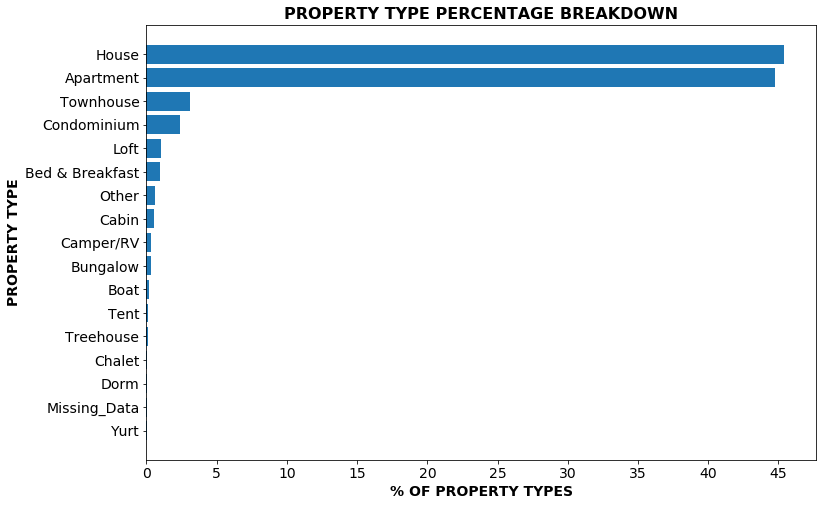

In [29]:
p_name = prop_type_percentage['Property_type']
p_count = prop_type_percentage['% of Property_types']


fig,ax = plt.subplots(figsize=(12,8))
ax.barh(p_name, p_count)
ax.invert_yaxis()
plt.xticks(fontsize=14)
plt.xticks(np.arange(0, 50, 5))
plt.yticks(fontsize=14)
ax.set_xlabel('% OF PROPERTY TYPES', fontsize=14, weight="bold")
ax.set_ylabel('PROPERTY TYPE', fontsize=14, weight="bold")
ax.set_title('PROPERTY TYPE PERCENTAGE BREAKDOWN', fontsize=16, weight="bold")


<size font=3><b> Question 3: What % of listings are for entire place compared to private or share rooms in listings database?</size></b>

To answer the above question we need to analyze the following columns
1. "room_type"


In [30]:
df['room_type'].value_counts()

Entire home/apt    2535
Private room       1156
Shared room         117
Name: room_type, dtype: int64

In [31]:
room_p = df['room_type'].value_counts()/len(df['room_type'])*100
room_p

Entire home/apt    66.570378
Private room       30.357143
Shared room         3.072479
Name: room_type, dtype: float64

In [32]:
room_percentage = room_p.rename_axis('ROOM TYPE').reset_index(name='% OF ROOM TYPE')
room_percentage

,ROOM TYPE,% OF ROOM TYPE
0,Entire home/apt,66.570378
1,Private room,30.357143
2,Shared room,3.072479


Text(0.5, 1.0, 'ROOM TYPE PERCENTAGE BREAKDOWN')

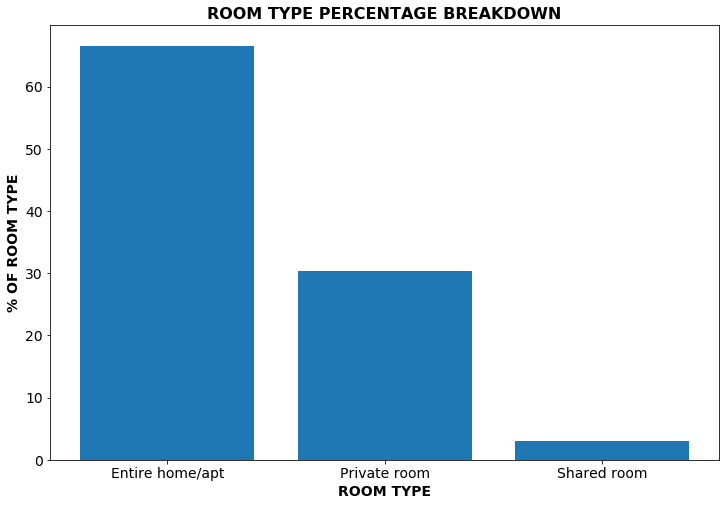

In [33]:
r_name = room_percentage['ROOM TYPE']
r_count = room_percentage['% OF ROOM TYPE']

fig,ax = plt.subplots(figsize=(12,8))
ax.bar(r_name, r_count)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('ROOM TYPE', fontsize=14, weight="bold")
ax.set_ylabel('% OF ROOM TYPE', fontsize=14, weight="bold")
ax.set_title('ROOM TYPE PERCENTAGE BREAKDOWN', fontsize=16, weight="bold")

<size font=3><b> Question 4: Are the number of hosts increasing every year in Seattle??</size></b>

To answer the above question we need to analyze the following columns
1. "host_since"
2. "host_since_Year" - extract of year from host_since date

latest year of the listings file which is 2016 has only data from first 3 days 2016, since we do not have data for the whole year of 2016 we wil remove 2016 from our chart.
Also in 2008 which is the earliest year in the dataset, we have only data for one day in NOV, so we will remove 2008 from the chart

In [34]:
host_per_year = df['host_since_Year'].value_counts().sort_index()

In [35]:
host_count_year = host_per_year[1:-1].rename_axis("YEAR").reset_index(name="HOST_COUNT")
host_count_year

,YEAR,HOST_COUNT
0,2009,64
1,2010,149
2,2011,397
3,2012,537
4,2013,775
5,2014,897
6,2015,980


Text(0.5, 1.0, 'NEW HOSTS SIGNUPS PER YEAR')

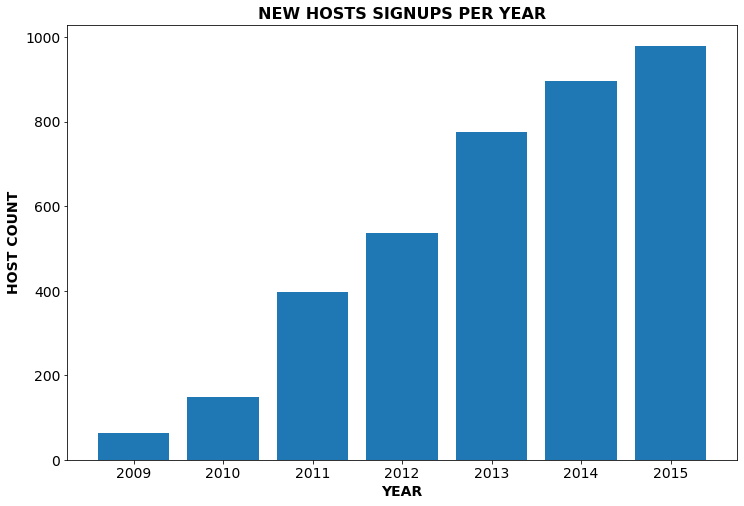

In [36]:
year = host_count_year['YEAR']
year_count = host_count_year['HOST_COUNT']

fig,ax = plt.subplots(figsize=(12,8))
ax.bar(year, year_count)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('YEAR', fontsize=14, weight="bold")
ax.set_ylabel('HOST COUNT', fontsize=14, weight="bold")
ax.set_title('NEW HOSTS SIGNUPS PER YEAR', fontsize=16, weight="bold")


Lets also check what months have the most host signups.

In [38]:
host_per_month = df['host_since_month'].value_counts().sort_index()
host_count_month = host_per_month.rename_axis("Month").reset_index(name="HOST_COUNT")
host_count_month

,Month,HOST_COUNT
0,1,271
1,2,271
2,3,298
3,4,278
4,5,351
5,6,296
6,7,413
7,8,490
8,9,329
9,10,312


Text(0.5, 1.0, 'NEW HOSTS SIGNUPS BY MONTH')

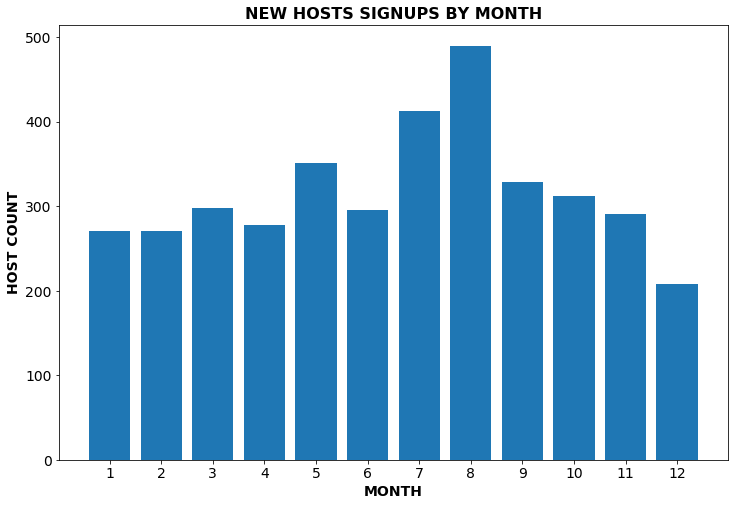

In [79]:
month = host_count_month['Month']
month_count = host_count_month['HOST_COUNT']

fig,ax = plt.subplots(figsize=(12,8))
ax.bar(month, month_count)
plt.xticks(fontsize=14)
plt.xticks(np.arange(1, 13, 1))
plt.yticks(fontsize=14)
ax.set_xlabel('MONTH', fontsize=14, weight="bold")
ax.set_ylabel('HOST COUNT', fontsize=14, weight="bold")
ax.set_title('NEW HOSTS SIGNUPS BY MONTH', fontsize=16, weight="bold")

<size font=3><b> Question 5: What is the average price of listings per month?</size></b>

To answer the above question we need to analyze the following columns in calender database
1. "date"
2. "available"
3. "price"

In [40]:
df_calender = pd.read_csv('calendar.csv')
df_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [41]:
# Create 3 new col which holds only year, month and month-year seperately from date column in calendar df 
# This will help us in our analysis to answer business questions.

df_calender['date_Year'] = pd.DatetimeIndex(df_calender['date']).year.astype(int)
df_calender['date_month'] = pd.DatetimeIndex(df_calender['date']).month.astype(int)
df_calender['date_year-month'] = pd.to_datetime(df_calender['date']).dt.to_period('M')

In [42]:
df_calender.head()

,listing_id,date,available,price,date_Year,date_month,date_year-month
0,241032,2016-01-04,t,$85.00,2016,1,2016-01
1,241032,2016-01-05,t,$85.00,2016,1,2016-01
2,241032,2016-01-06,f,NaN,2016,1,2016-01
3,241032,2016-01-07,f,NaN,2016,1,2016-01
4,241032,2016-01-08,f,NaN,2016,1,2016-01


We will replace NaN with 0 in price column since price is not available the availability is false.

In [43]:
df_calender['price'] = df_calender['price'].fillna(0)
df_calender.head()

,listing_id,date,available,price,date_Year,date_month,date_year-month
0,241032,2016-01-04,t,$85.00,2016,1,2016-01
1,241032,2016-01-05,t,$85.00,2016,1,2016-01
2,241032,2016-01-06,f,0,2016,1,2016-01
3,241032,2016-01-07,f,0,2016,1,2016-01
4,241032,2016-01-08,f,0,2016,1,2016-01


In [44]:
# we will break the df into 2, one for dates where there is availability and one for un-available

df_avail = df_calender[df_calender['available']=="t"]
df_unavail = df_calender[df_calender['available']=="f"]

In [45]:
# remove $ sign from price col
dollar_cols_calendar = ["price"]

for col in dollar_cols_calendar:
    df_avail[col] = df_avail[col].str.replace(',', '').str.replace('$', '').astype(float)

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [46]:
df_avail.head()

,listing_id,date,available,price,date_Year,date_month,date_year-month
0,241032,2016-01-04,t,85.0,2016,1,2016-01
1,241032,2016-01-05,t,85.0,2016,1,2016-01
9,241032,2016-01-13,t,85.0,2016,1,2016-01
10,241032,2016-01-14,t,85.0,2016,1,2016-01
14,241032,2016-01-18,t,85.0,2016,1,2016-01


In [47]:
avg_monthly_price = df_avail.groupby('date_month')['price'].mean().reset_index().rename(columns={'date_month':'Month','price' : 'Avg.Price'})

Text(0.5, 1.0, 'AVG. LISTING PRICE BY MONTH')

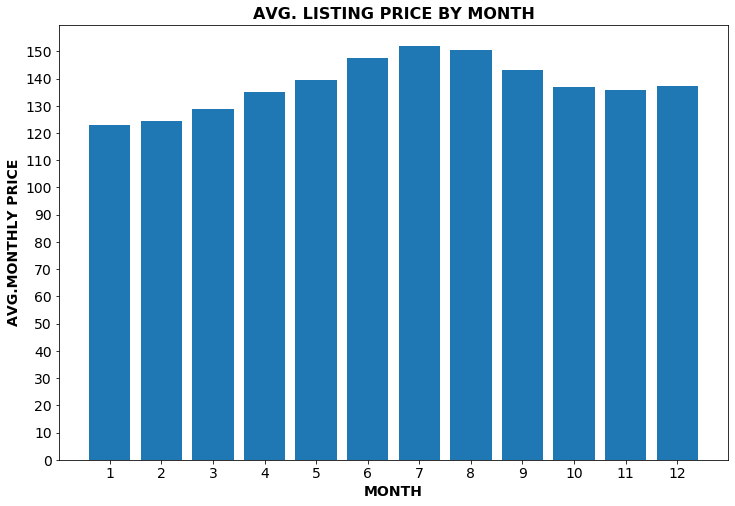

In [80]:
m_name = avg_monthly_price['Month']
m_price = avg_monthly_price['Avg.Price']

fig,ax = plt.subplots(figsize=(12,8))
ax.bar(m_name, m_price)
plt.xticks(fontsize=14)
plt.xticks(np.arange(1, 13, 1))
plt.yticks(fontsize=14)
plt.yticks(np.arange(0, 160, 10))
ax.set_xlabel('MONTH',fontsize=14, weight="bold")
ax.set_ylabel('AVG.MONTHLY PRICE',fontsize=14, weight="bold")
ax.set_title('AVG. LISTING PRICE BY MONTH',fontsize=16, weight="bold")